<a href="https://colab.research.google.com/github/hedonist04/morse/blob/main/morse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pathlib import Path
from IPython.display import Audio

def find_source_paths():
    source_paths = []
    patterns = ['*.mp3', '*.wav']
    for p in Path.cwd().iterdir():
        if any(p.match(t) for t in patterns):
            source_paths.append(str(p))
    return source_paths

source_path = find_source_paths()[0]
print(source_path)
Audio(source_path)

/content/morzyanka-azbuka-morze.mp3


<ipython-input-6-0f7bc13d132c>:5: UserWarning: PySoundFile failed. Trying audioread instead.
  ampl, sr = librosa.load(source_path)
/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


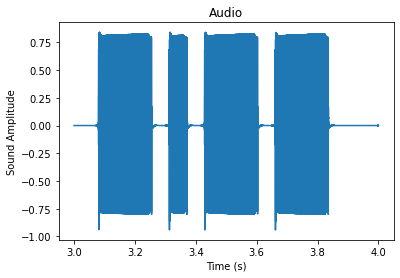

In [6]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

ampl, sr = librosa.load(source_path)
time = np.arange(len(ampl)) / sr

def create_audio_slice_plot(start=0, end=len(time)):
    fig, axis = plt.subplots()
    plt.title('Audio')

    axis.plot(time[sr * start:sr * end], ampl[sr * start:sr * end])
    axis.set(xlabel='Time (s)', ylabel='Sound Amplitude')

create_audio_slice_plot(start=3, end=4)
plt.show()

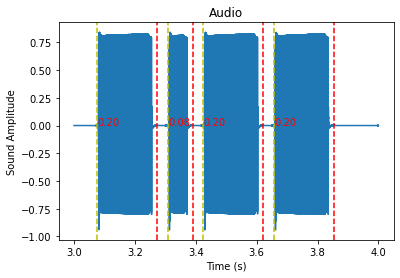

In [34]:
from collections import namedtuple

clips = librosa.effects.split(ampl, top_db=10, frame_length=512, hop_length=256)
clips = [[l / sr, r / sr] for l, r in clips]

ds = []
ss = []
for i in range(len(clips) - 1):
    l, r = clips[i]

    if i + 1 == len(clips) - 1:
        ds.append(r - l)
        ss.append(0)
        break

    next_l = clips[i + 1][0]
    ds.append(r - l)
    ss.append(next_l - r)

def create_plot(start=0, end=len(time)):
    create_audio_slice_plot(start=start, end=end)

    for i in range(len(clips)):
        l, r = clips[i]
        if not (start <= l <= end and start <= r <= end):
            continue
        plt.axvline(x=l, color='y', ls='--')
        plt.axvline(x=r, color='r', ls='--')

        plt.text(l, 0, "{:.2f}".format(ds[i]), color='r')

create_plot(start=3, end=4)
plt.show()

In [38]:
mds = np.mean(ds)
mss = np.mean(ss)

res = ''
for i in range(len(ds)):
    if ds[i] > mds:
        res += '-'
    else:
        res += '.'
    
    if ss[i] > mss:
        res += ' '
print(res)


--. .--- .. - -.- -.-- ..-. . --.- ...- . .-.. -... -.- ..-. ...- -.-- - --. .--- . --.- -..- -. .--- -. ... ...- - -.-- --.. -.-. -.- . .. -.-. -.- . .. ..-. - .. -- -.. -.-. .... ..-. -.. -.-- .--- -.-- -... - .... -.. -.-- - --. .--- --.- ...- - .. -
